# General Findings & Commentary


## Popularity

### It's about creating a name for the company, not just immediate profitability

## Studios
Possible future avenues for determining the top studios is performance over time. When were they last active? etc...

## Regarding gross revenue

It appears that both *Box Office Mojo* and *The Numbers* provide metrics for domestic gross revenue. However, they don't always match. Initially, *Box Office Mojo* rounds their values significantly, but it is more than that. In some cases, it is within a margin of error/difference, but in other cases it is way off. The below histogram shows the *percent difference* between the two data sets, only included movies for which both datasets provide data. Values from *The Numbers* are rounded to the same extent as *Box Office Mojo*. In a scenario of two equal datasets, the percent difference for all values in the histogram would be exactly equal. Obviously, this isn't the case.

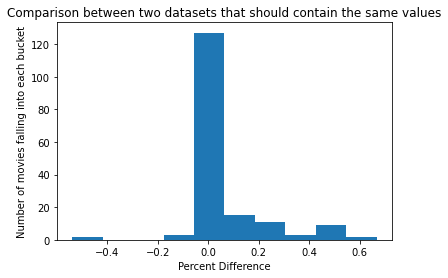

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

#import from CSV
df_bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
df_tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

#Combine two movie budget dataframes
q = '''
SELECT * 
FROM df_tn_movie_budgets tn
LEFT JOIN df_bom_movie_gross bom
ON tn.movie == bom.title
WHERE bom.domestic_gross > 0
;'''
finances = pysqldf(q)



#Round domestic gross values from The Numbers
temp = pd.DataFrame()
temp['a'] = finances['domestic_gross'].iloc[:,0]
temp['b'] = [int(x.replace('$','').replace(',','')) for x in temp['a']]
temp['c'] = [float(round(x, -5)) for x in temp['b']]
temp['bom'] = finances['domestic_gross'].iloc[:,1]
temp['eq'] = temp['c'] == temp['bom']

#temp['eq'].value_counts()

non_equals = temp.loc[temp['eq'] == False]
non_equals = non_equals.drop(axis=1, labels=['a','b', 'eq'])/10**5
non_equals.columns = ['The Numbers (DG)', 'Box Office Mojo (DG)']
a = [int(x) for x in non_equals['The Numbers (DG)']]
b = [int(x) for x in non_equals['Box Office Mojo (DG)']]

non_equals = pd.DataFrame({'The Numbers (DG)':a, 'Box Office Mojo (DG)':b})
non_equals['Is "TN" >= "BOM"'] = non_equals.iloc[:,0] >= non_equals.iloc[:,1]
non_equals.iloc[:,2].value_counts()
non_equals['% diff'] = (non_equals.iloc[:,0] - non_equals.iloc[:,1]) / non_equals.iloc[:,0]

plt.hist(non_equals['% diff'].loc[(non_equals['% diff']> -0.8) & (non_equals['% diff'] < 0.8)], bins=10)
plt.xlabel('Percent Difference')
plt.ylabel('Number of movies falling into each bucket')
plt.title('Comparison between two datasets that should contain the same values')
plt.show()

### Conclusions that can be drawn:

- It is possible that the two datasets correspond to a different period in time. For example, the revenue will of course be higher in 2015 than it was in 2010. That said, there are still outlier, indicating that either there is more going on, or there are simply inexplicable incorrect data points in a few cases for each dataset. 

For the remainder of the analysis, revenue values from *The Numbers* will be used. They are way more precise and may correspond better to actual metrics.